 Activation Function Comparison

In [13]:
pip install pandas scikit-learn tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [15]:
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
X = StandardScaler().fit_transform(X) 
y = to_categorical(y) 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
def create_model(activation):
    model = Sequential()
    model.add(Dense(8, activation=activation, input_shape=(4,)))  
    model.add(Dense(3, activation='softmax'))  # output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
activations = ['relu', 'sigmoid', 'tanh']
loss_history = {}

In [20]:
for act in activations:
    print(f"Training with {act} activation...")
    model = create_model(act)
    history = model.fit(X_train, y_train, epochs=10, verbose=0)
    loss_history[act] = history.history['loss']

Training with relu activation...


c:\Users\loalo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with sigmoid activation...
Training with tanh activation...


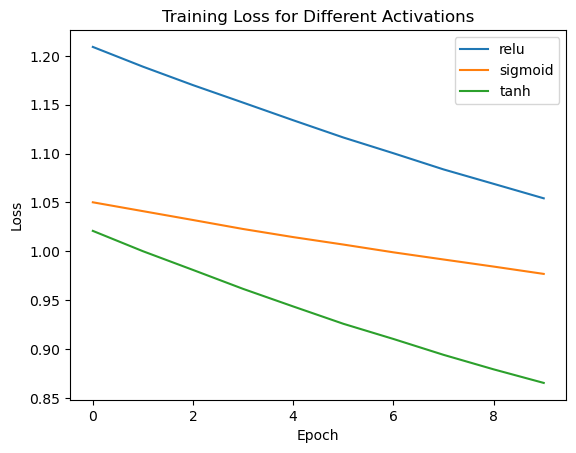

In [21]:
plt.title("Training Loss for Different Activations")
for act in activations:
    plt.plot(loss_history[act], label=act)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()